In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
bnk_f=pd.read_csv('F:/bank-full.csv',sep=';')
bnk_f.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bnk_f.shape

(45211, 17)

In [4]:
bnk_f['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [5]:
bnk_fi=bnk_f.drop(bnk_f.iloc[:,[1,2,4,6,7,9,10,-2]],axis=1)
bnk_fi.head()

,age,education,balance,contact,duration,campaign,pdays,previous,y
0,58,tertiary,2143,unknown,261,1,-1,0,no
1,44,secondary,29,unknown,151,1,-1,0,no
2,33,secondary,2,unknown,76,1,-1,0,no
3,47,unknown,1506,unknown,92,1,-1,0,no
4,33,unknown,1,unknown,198,1,-1,0,no


In [6]:
bnk_fi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   education  45211 non-null  object
 2   balance    45211 non-null  int64 
 3   contact    45211 non-null  object
 4   duration   45211 non-null  int64 
 5   campaign   45211 non-null  int64 
 6   pdays      45211 non-null  int64 
 7   previous   45211 non-null  int64 
 8   y          45211 non-null  object
dtypes: int64(6), object(3)
memory usage: 3.1+ MB


In [7]:
#converting object or categorical datatypes into numerical form with the help of label encoder.
def Encoder(bnk_fi):
          columnsToEncode = list(bnk_fi.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  bnk_fi[feature] = le.fit_transform(bnk_fi[feature])
              except:
                  print('Error encoding '+feature)
          return bnk_fi




In [8]:
Encoder(bnk_fi)

,age,education,balance,contact,duration,campaign,pdays,previous,y
0,58,2,2143,2,261,1,-1,0,0
1,44,1,29,2,151,1,-1,0,0
2,33,1,2,2,76,1,-1,0,0
3,47,3,1506,2,92,1,-1,0,0
4,33,3,1,2,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,2,825,0,977,3,-1,0,1
45207,71,0,1729,0,456,2,-1,0,1
45208,72,1,5715,0,1127,5,184,3,1
45209,57,1,668,1,508,4,-1,0,0


In [9]:
bnk_fi.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936,10.619,18.0,33.0,39.0,48.0,95.0
education,45211.0,1.225,0.748,0.0,1.0,1.0,2.0,3.0
balance,45211.0,1362.272,3044.766,-8019.0,72.0,448.0,1428.0,102127.0
contact,45211.0,0.640,0.898,0.0,0.0,0.0,2.0,2.0
duration,45211.0,258.163,257.528,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.764,3.098,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.198,100.129,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580,2.303,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.117,0.321,0.0,0.0,0.0,0.0,1.0


age


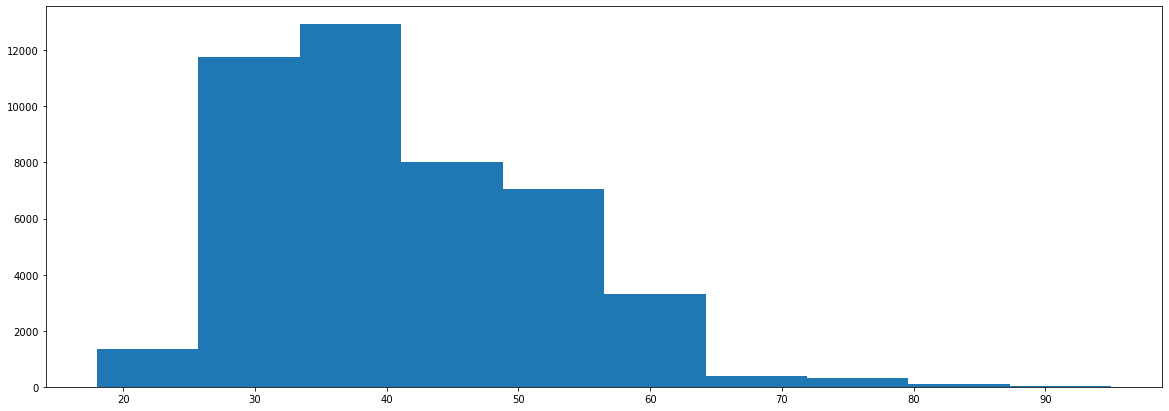

education


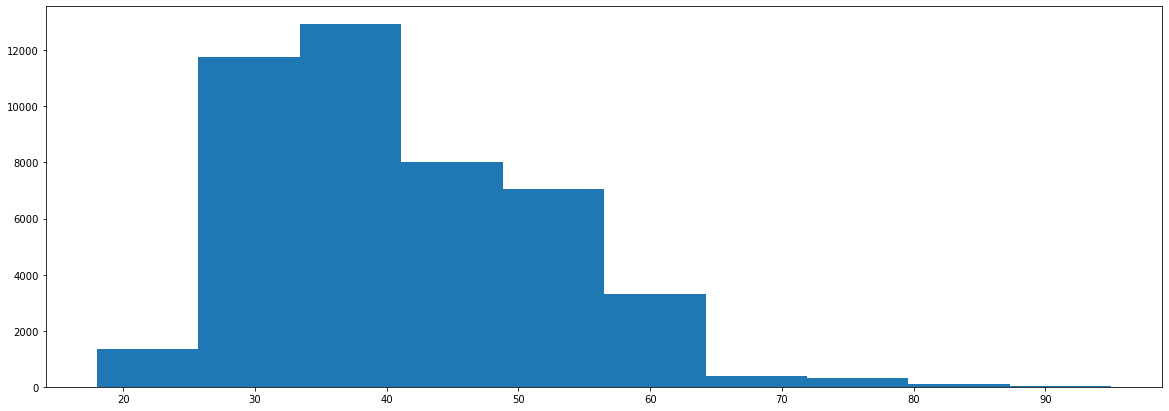

balance


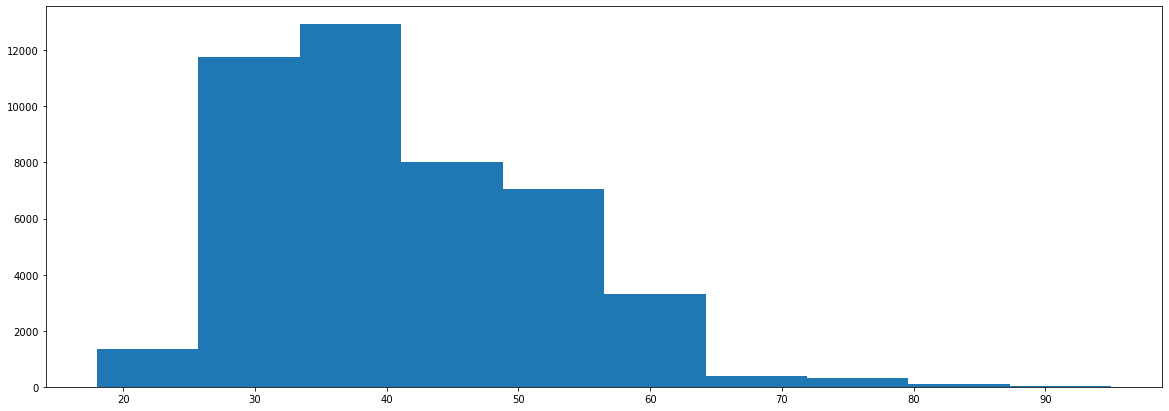

contact


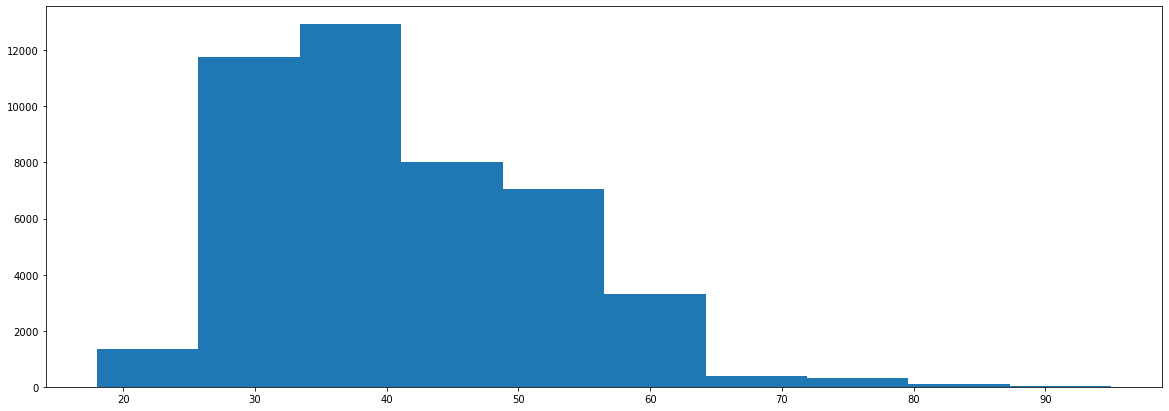

duration


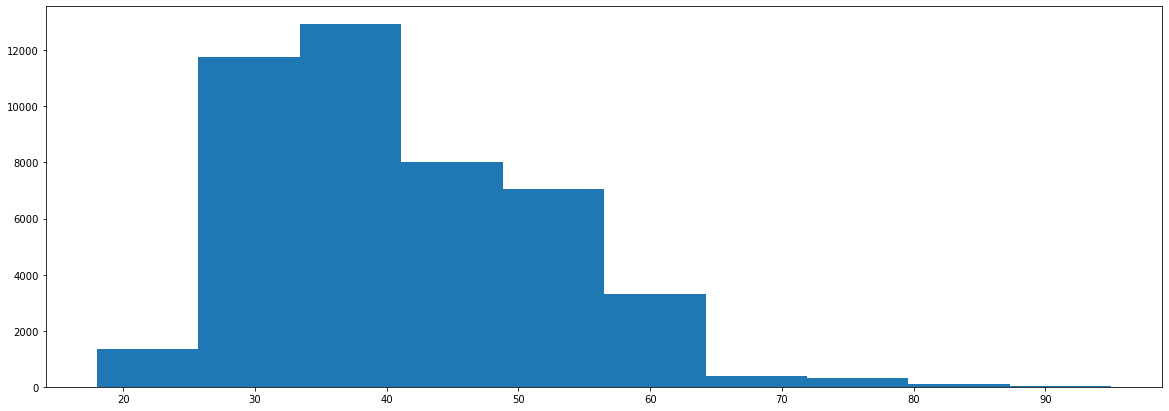

campaign


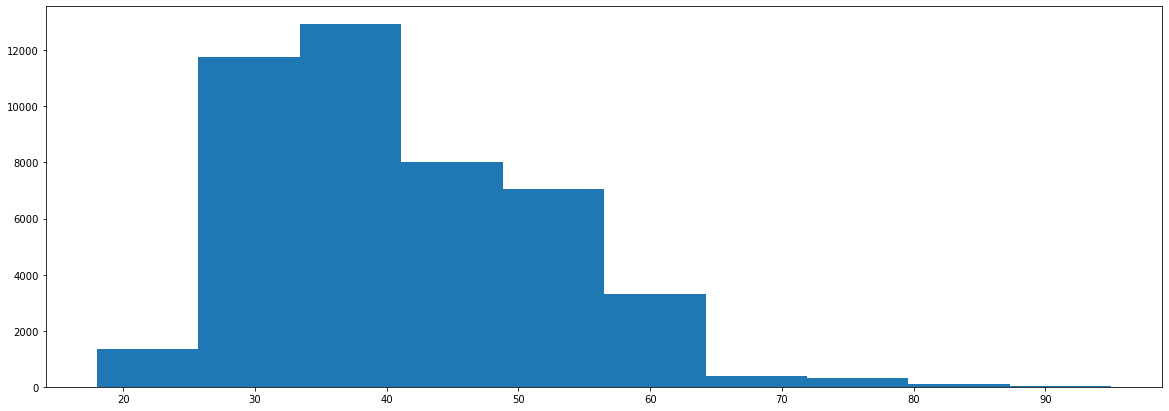

pdays


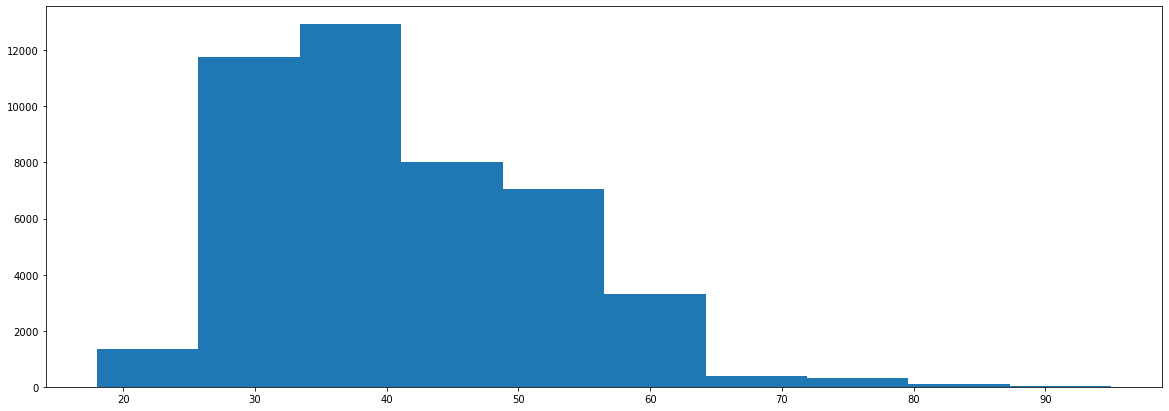

previous


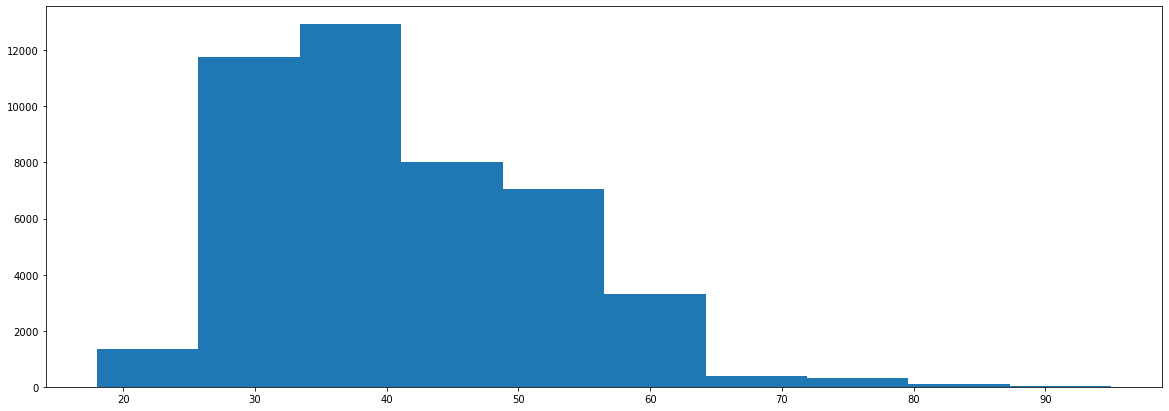

y


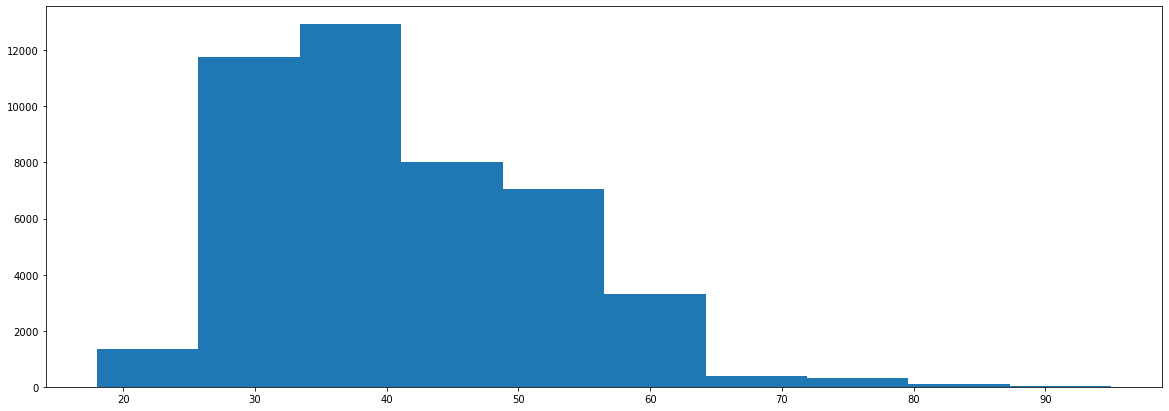

In [10]:
bnk_hist=bnk_fi.select_dtypes(include='number')
b=[]
for i in bnk_hist:
    print(i)
    plt.figure(figsize=(20,7))
    plt.hist(bnk_fi['age'])
    plt.show()

In [11]:

outliers=[]
def outlier_values(bnk_fi):
    q1,q3=np.percentile(bnk_fi,[25,75])
    iqr=q3-q1
    lq=iqr*1.5-q1
    uq=iqr*1.5+q3
    
    for i in bnk_fi:
        if i<lq or i>uq:
            outliers.append(i)
    return outliers  

In [12]:
outlier_values(bnk_fi['age'])

[83,
 75,
 75,
 83,
 75,
 72,
 71,
 76,
 83,
 71,
 85,
 72,
 90,
 71,
 82,
 73,
 74,
 71,
 75,
 78,
 85,
 80,
 71,
 78,
 73,
 75,
 94,
 72,
 83,
 79,
 78,
 83,
 73,
 76,
 83,
 77,
 73,
 74,
 73,
 77,
 71,
 71,
 80,
 82,
 75,
 77,
 78,
 78,
 86,
 76,
 72,
 74,
 77,
 74,
 79,
 71,
 74,
 78,
 73,
 73,
 95,
 74,
 71,
 78,
 71,
 75,
 75,
 82,
 74,
 81,
 76,
 72,
 75,
 72,
 71,
 72,
 77,
 73,
 85,
 83,
 78,
 73,
 79,
 71,
 71,
 80,
 72,
 78,
 79,
 71,
 82,
 81,
 79,
 71,
 79,
 79,
 73,
 75,
 72,
 71,
 75,
 78,
 75,
 80,
 80,
 74,
 73,
 71,
 72,
 72,
 77,
 79,
 73,
 71,
 80,
 71,
 83,
 71,
 73,
 78,
 72,
 81,
 81,
 71,
 74,
 75,
 82,
 80,
 76,
 74,
 74,
 77,
 71,
 71,
 77,
 76,
 72,
 74,
 74,
 72,
 73,
 82,
 77,
 71,
 79,
 89,
 76,
 81,
 74,
 73,
 71,
 71,
 77,
 72,
 84,
 86,
 72,
 72,
 76,
 73,
 74,
 82,
 71,
 83,
 72,
 73,
 73,
 74,
 72,
 78,
 86,
 76,
 79,
 71,
 81,
 77,
 82,
 72,
 73,
 73,
 74,
 71,
 73,
 76,
 71,
 71,
 83,
 71,
 80,
 79,
 77,
 74,
 84,
 95,
 77,
 78,
 79,
 83,
 83,
 73,


In [13]:
print("Highest allowed",bnk_fi['age'].mean() + 3*bnk_fi['age'].std())
print("Lowest allowed",bnk_fi['age'].mean() - 3*bnk_fi['age'].std())

Highest allowed 72.79249633725466
Lowest allowed 9.079924091402077


age


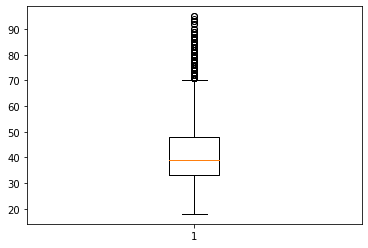

education


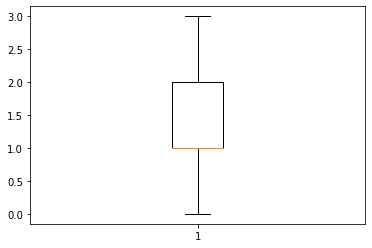

balance


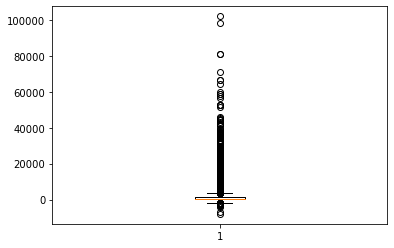

contact


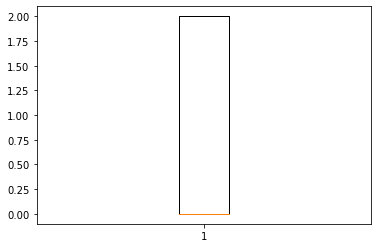

duration


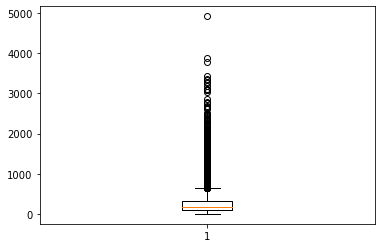

campaign


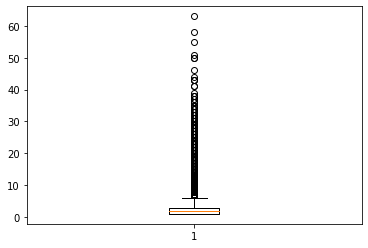

pdays


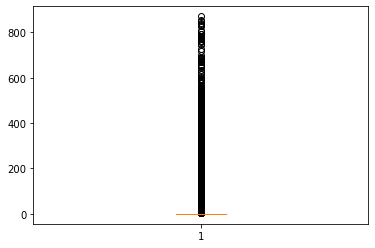

previous


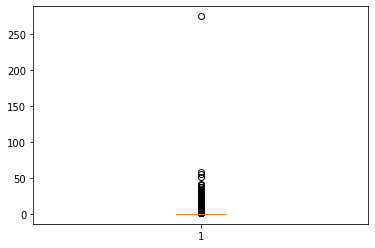

y


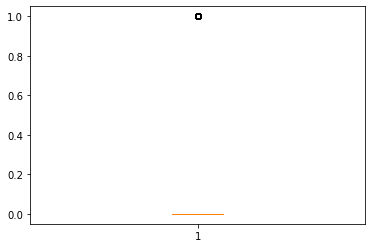

In [14]:

bnk_num=bnk_fi.select_dtypes(include='number')
a=[]
for i in bnk_num:
    print(i)
    plt.boxplot(bnk_num[i])
    plt.show()

In [15]:
bnk_fi[bnk_fi.duplicated()]
bnk_fi=bnk_fi.drop_duplicates()

In [16]:
bnk_fi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45194 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45194 non-null  int64
 1   education  45194 non-null  int32
 2   balance    45194 non-null  int64
 3   contact    45194 non-null  int32
 4   duration   45194 non-null  int64
 5   campaign   45194 non-null  int64
 6   pdays      45194 non-null  int64
 7   previous   45194 non-null  int64
 8   y          45194 non-null  int32
dtypes: int32(3), int64(6)
memory usage: 2.9 MB


In [18]:
#Dividing whole data into test and train data.
x=bnk_fi.drop(['y'],axis=1)
y=bnk_fi.iloc[:,8]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
x=poly.fit_transform(x)

In [20]:
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#x_train=ss.fit_transform(x_train)
#x_test=ss.fit(x_test)

In [21]:
le=LogisticRegression()
model=le.fit(x_train,y_train)
y_pred=le.predict(x_test)
y_pred

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [22]:
#y.value_counts()
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7958
           1       0.57      0.19      0.28      1081

    accuracy                           0.89      9039
   macro avg       0.74      0.58      0.61      9039
weighted avg       0.86      0.89      0.86      9039



In [25]:
y_pred_df= pd.DataFrame({'actual': y_test,
                         'predicted_prob': y_pred})

In [26]:
y_pred_df

,actual,predicted_prob
38412,0,0
34785,0,0
12786,0,0
5042,0,0
11649,0,0
...,...,...
313,0,0
33419,0,0
44313,1,0
5963,0,0
